In [184]:
import numpy as np
import pylab
import scipy
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Importance sampling

We'll look at an example where we can compute the posterior exactly and compare it to an approximation computed via importance sampling.

Suppose we have the following model:
\begin{align}
\mu &\sim N(0, 9) \\
x_{1:n} &\sim N(\mu, 1)
\end{align}

Because this is a conjugate model, we can compute the posterior exactly:
$$p(\mu | x_{1:n}) = N\left(\mu \,\bigg|\, \frac{\sum_i x_i}{(1/9 + n)}, 9/(1+9n) \right).$$

To compute the importance sampling procedure, we first collect samples from some importance distribution $\mu_i \sim q(\mu)$,
and then compute the unnormalized weights:
$$ w_i \propto \frac{p(\mu_i) p(x_{1:n} | \mu_i)}{q(\mu_i)}$$

The normalized weights $w_i$ give us an approximation to the posterior.
Here $q$ is some distribution with the same support as the posterior that we know how to sample from. In general we want $q$ to have longer tails than the posterior.

In [15]:
def generate_data(n=100):
    mu = np.random.normal(0, 9)
    return np.random.normal(mu, 1, n)

In [16]:
n=100
data = generate_data(n)

In [54]:
c = 1./9 + n
vals = [scipy.stats.distributions.norm.pdf(m, data.sum()/c, np.sqrt(1./c)) for m in np.arange(12.5,13.5,0.01)]

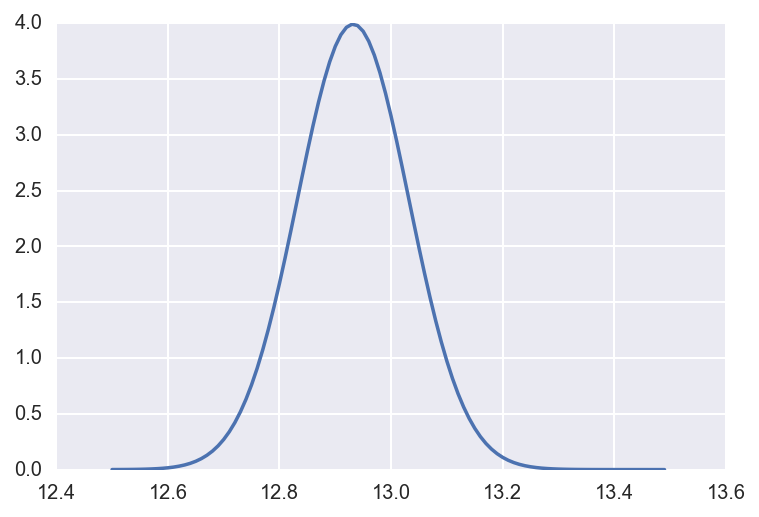

In [185]:
pylab.plot(np.arange(12.5,13.5,0.01), vals)

In [126]:
def importance_sample(data, nsamps=100):
    from scipy.stats.distributions import norm
    mus = np.random.normal(0, 5, nsamps)
    
    wts = np.zeros(nsamps)
    for i, mu in enumerate(mus):
        wts[i] = norm.logpdf(mu, 0, 3) + sum(norm.logpdf(data, mu, 1)) - norm.logpdf(mu, 0, 5)

    # stabilize weights
    wts - wts.max()
    wts = wts - np.log(sum(np.exp(wts)))
    
    return np.exp(wts), mus

In [182]:
wts, mus = importance_sample(data, 30000)

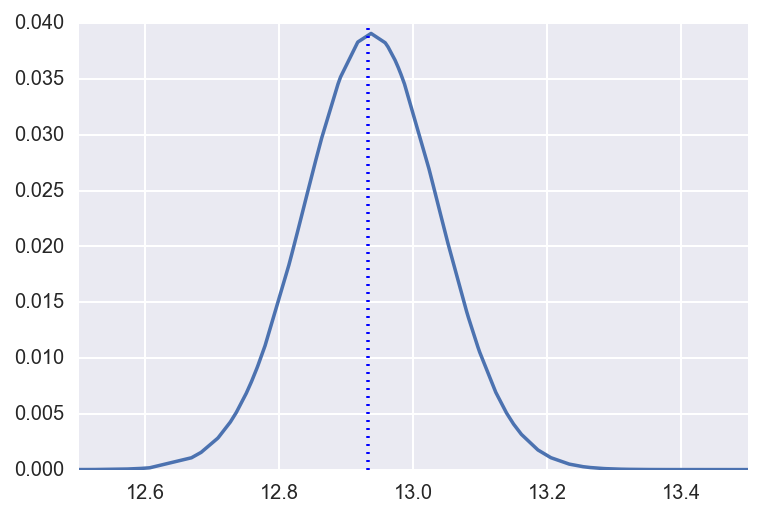

In [186]:
inds = np.argsort(mus)
wts_s = wts[inds]
mus_s = mus[inds]
pylab.plot(mus_s, wts_s)
pylab.xlim((12.5,13.5))
pylab.axvline(sum(mus*wts), ls='dotted')

Above we've plotted the importance weights and the posterior mean.